In [1]:

from selenium.webdriver.common.keys import Keys                   # provide keys in the keyboard like RETURN, F1, ALT
from selenium.webdriver.support.ui import Select                  # to select the option html attribute
from selenium.webdriver.support.ui import WebDriverWait           # To use implcit and explicit wait
from selenium.webdriver.support import expected_conditions as EC  # use in explicitly wait
from selenium.webdriver.common.by import By                       # to select the attribute by Class,link_text
from selenium import webdriver                                    # import web Driver
import time                                                       # it use in wait
from bs4 import BeautifulSoup                                     # work with attribute 
import matplotlib.pyplot as plt                                   # to plot the graph

### LOGGING IN INSTAGRAM 

In [2]:
driver = webdriver.Firefox() # saved ' gecko ' in the same file folder
driver.get("https://www.instagram.com/") # passing instagram link 
wait = WebDriverWait(driver , 10) # wait for 15 secs 

In [3]:
# finding input fields
wait = WebDriverWait(driver , 5)
u_name = driver.find_element_by_name("username") # finding input fields by name ' username '
password = driver.find_element_by_name("password") # finding input fields by name ' password '

# entering credentials 
u_name.send_keys("instabotcn")  
password.send_keys('06shishe11')

In [4]:
# fetching all button type elements and finding which one is ' Log In ' 
login = driver.find_elements_by_tag_name("button")
for el in login:
    print(el.text)
log = login[1].click()

Show
Log In
Log in with Facebook


In [5]:
wait = WebDriverWait( driver , 10 ) # wait for 10 secs before clicking 

# confirmation alert is popped asking to save login information ... we click ' Not Now '
decline = driver.find_element_by_class_name('cmbtv') # div class of not now 
decline.click()
wait = WebDriverWait( driver , 10 ) # wait for 10 secs before clicking 

In [6]:
# Notification alert asked ... we click ' Not Now '
decline_noti = driver.find_element_by_xpath('//div[@class = "mt3GC"]//button[2]') # div class of not now 
decline_noti.click()
print("Successfully Logged In !!!")

Successfully Logged In !!!


### 1)  Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

#### 1.1) From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [11]:
a = driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]') # search box for passing input
a.send_keys('food') # passing food
time.sleep(3) # sleep 3 sec.
handles = driver.find_elements_by_xpath('//a[@class = "-qQT3"]') # fetching top food list handles 

food_list = []  # making a list that holds names
for i in handles:
    if 'explore' in i.get_attribute('href'): # if explore present in link then it is a hashtag
        continue
    else:       
        s = i.get_attribute('href').split('/') # https://www.instagram.com/foodtalkindia
        food_list.append(s[3])   # appending s[3] in food_list  
a = driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]') # search input box again for further questions 
a.clear() # clear box                                                     

new_food_list = food_list[:10] # top 10 search results 

In [12]:
new_food_list # printing list of top 10 search result

['foodieveggie',
 'foodfeastfiesta',
 'foodexcursionist90',
 'foodiesoul08',
 'food_belly11',
 'foodzeee',
 'food',
 'the.food_cult',
 'delhifoodguide',
 'delhifoodie']

In [13]:
followers_count = [] # folowers count list for respective handles 
d = {} # dictionary for user and count 
for ele in new_food_list:
    time.sleep(2) # wait for loading data
    a = driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]') # search box for passing input
    a.send_keys(ele) # passing food
    time.sleep(3) # sleep 3 sec.
    handles = driver.find_element_by_xpath('//a[@class = "-qQT3"]') # fetching handles 
    handles.click() # clicking on handle
    
    follower = driver.find_elements_by_xpath('//ul[@class = "k9GMp "]/li[2]/a/span') # fetching followers
    for i in follower:
        print(i.get_attribute("title"))
        followers_count.append(i.get_attribute("title")) # getting no. of followers 
        d[ele] = i.get_attribute("title") # maintaining the dictionary
    a = driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]') # search box for passing input
    a.clear()  

2,998
1,818
2,413
3,993
7,300
594,390
2,998
48,913
102,017
10,409


In [14]:

for key , val in d.items():
    p = val.split(",")  # removing 110,220 comma (",")
    count = int("".join(p)) # joining the seperated part to get the followers 
    d[key] = count # maintaining and updating the data using dictionary

c = 1 # counter 
top_5_blog = [] # user list
max_follow = [] # follower count
for i in sorted (d.items(), key = lambda kv: kv[1],reverse=True):
    top_5_blog.append(i[0],) # adding in list
    max_follow.append(i[1])  # adding in max_follow for further use
    print(i) # printing the values               
    c += 1 # incrementing 
    if c > 5: # check condition
        break # only 5 values required 


('foodzeee', 594390)
('delhifoodguide', 102017)
('the.food_cult', 48913)
('delhifoodie', 10409)
('food_belly11', 7300)


#### 1.2) Now Find the number of posts these handles have done in the previous 3 days.

going to each post and then extracting the date using time tag and then comparing it

In [181]:
"""no_of_post={}
cnt = [] 
for handle in top_5_blog:
    a = driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')   #input box 
    a.send_keys(handle)                                                         #send hadles to search box
    # b = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'z556c')))          #first profile
    time.sleep(2)
    handles = driver.find_element_by_xpath('//a[@class = "-qQT3"]') # fetching handles 
    handles.click() # clicking on handle
    a = driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')  #clearing input box
    a.clear()
    
    i = 0
    
    
    for i in range(7):
        driver.execute_script('window.scrollBy(0,document.body.scrollHeight);')              
        #scrolling 7 time down
        time.sleep(1)
    data = driver.find_elements_by_class_name("v1Nh3") 
   
    #fetching the post
    
    
    date_val = '12'
    count = 0
    for i in range (len(data)):
        
        
        data[i].click() 
        time.sleep(3) 
        data = driver.find_elements_by_class_name("v1Nh3")
        data[i].click()
        close_btn = wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"TxciK")]/button')))
        date = driver.find_element_by_tag_name("time")
        d = date.get_attribute("title")[4:6]
        if d > date_val:
            count += 1
            close_btn.click()
        else:
            close_btn.click()
        
    cnt.append(count)
    # print(count)  
       
        
print(cnt)
        
"""

ElementClickInterceptedException: Message: Element <div class="v1Nh3 kIKUG  _bz0w"> is not clickable at point (336,338) because another element <div class="_9AhH0"> obscures it


In [15]:
def Post_count(insta_handles) :
    d = {} 
    #cCounting Number of posts in past 3 days
    for i in insta_handles :
        driver.get('https://www.instagram.com/' +str(i)+'/') # visiting the most popular 5 handles
        time.sleep(3)
        posts = driver.find_elements_by_class_name('v1Nh3') # finding all posts on page
        count = 0
        posts[0].click() # clicking on first post
        while True : 
            try :
                time.sleep(3)
                upload_time = driver.find_element_by_class_name('_1o9PC').text.split(" ") # extracting text of time
                if (upload_time[1] == 'HOURS' or upload_time[1] == 'HOUR' or upload_time[1] == 'MINUTES') : # checking condns
                    count += 1
                elif (int(upload_time[0]) < 3) : # if > 3 days then break
                    count += 1
                else :
                    break
                next_button = driver.find_element_by_class_name('_65Bje') # clicking on next button to go to next post
                next_button.click()
            except ValueError :
                    break
        d[i] = count # updating dictionary
    return d
ans = Post_count(top_5_blog)
print(ans)

{'foodzeee': 2, 'delhifoodguide': 0, 'the.food_cult': 5, 'delhifoodie': 0, 'food_belly11': 5}


In [16]:
driver.back()

#### 1.3) Depict this information using a suitable graph.

In [17]:
number_posts = [] 
for val in ans.values():
    number_posts.append(val)

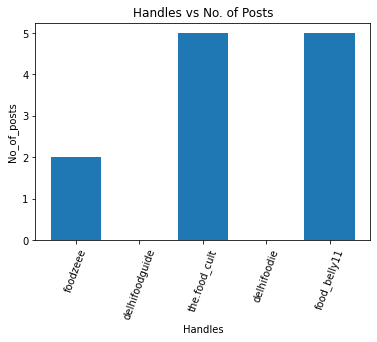

foodzeee 2
delhifoodguide 0
the.food_cult 5
delhifoodie 0
food_belly11 5


In [18]:
plt.bar(top_5_blog,number_posts)
plt.xticks(rotation=70)
plt.xlabel('Handles')
plt.ylabel('No_of_posts')
plt.title('Handles vs No. of Posts')
plt.show()
for key , val in ans.items():
    print(key , val)

### 2) Your friend also needs a list of hashtags that he should use in his posts.

#### 2.1) Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [19]:
def Post_text(insta_handles) :
    d = {} 
    #cCounting Number of posts in past 3 days
    post_text = [] 
    for i in insta_handles :
        driver.get('https://www.instagram.com/' +str(i)+'/') # visiting the most popular 5 handles
        time.sleep(3)
        posts = driver.find_elements_by_class_name('v1Nh3') # finding all posts on page
        count = 0
        posts[0].click() # clicking on first post
        count = 1
        while count <= 10 : 
            try :
                time.sleep(3)
                caption = driver.find_element_by_class_name('C4VMK') # extracting text of time
                print('-------------','Post',i,":",count,'-------------')
                print(caption.text) 
                post_text.append(caption.text)
                print()
                next_button = driver.find_element_by_class_name('_65Bje') # clicking on next button to go to next post
                next_button.click()
                
            except ValueError :
                    break
            count += 1
    return post_text
post_text = Post_text(top_5_blog)

------------- Post foodzeee : 1 -------------
foodzeee
Kaara boondhi / Crispy spicy boondhi

Detailed Recipe video in my youtube channel .Link in bio @foodzeee

#boondhi#kaaraboondhi #recipe #reelitfeelit #reelkarofeelkaro #foodzeee
1d

------------- Post foodzeee : 2 -------------
foodzeee
Chilli cheese corn toast

Detailed Recipe video in my youtube channel.Link in bio @foodzeee

#chillicheesetoast #toast#eid #recipe#reelitfeelit #reelkarofeelkaro #foodzeee
2d

------------- Post foodzeee : 3 -------------
foodzeee
Kumbakonam kadappa with mini uthappam.
Eid Mubarak❤️

Detailed recipe video in my youtube channel Link in bio @foodzeee

#kadappa#dosa#reelsinstagram #reelitfeelit#eid#eidmubarak #eid2021#reelkarofeelkaro #recipe#foodzeee
3d

------------- Post foodzeee : 4 -------------
foodzeee
Ras malai / rossomalai

Detailed Recipe in my youtube channel .Link in bio @foodzeee

#rasmalai#rasgulla #reelkarofeelkaro #reelitfeelit #recipe #foodzeee
5d

------------- Post foodzeee : 5 -----

------------- Post the.food_cult : 5 -------------
the.food_cult
Perfect Breakfast🤤❤️
Aapne kya khaya aaj breakfast mai?💕
.
.
.
Use #thefoodcult
.
.
.
🚫NO REPOST🚫
.
.
.
Follow @the.food_cult 🧡 Follow @the.food_cult 🧡 Follow @the.food_cult 🧡 Follow @the.food_cult 🧡 Follow @the.food_cult 🧡 Follow @the.food_cult 🧡 Follow @the.food_cult 🧡
.
.
.
.
#delhifoodblogger #delhifoodie #delhi #delhifood #foodphotography #foodporn #foodie #foodblogger #indianfood #delhistreetfood #foodstagram #foodtalkindia #delhigram #sodelhi #breakfast #delhidiaries #indianfoodbloggers #trendingnow #explorepage #delhiblogger #zingyzest #foodiesofinstagram #foodgasm #desikhana #streetfood #instafood #desifood #indianfoodblogger #bhfyp
2d

------------- Post the.food_cult : 6 -------------
the.food_cult
Creamy Masala Paneer with Layered Butter Naan🤤❤️
Sahi mai kaafi Buttery tha yeh🥺
.
.
.
📍Masala-e-Handi,Chander Nagar
.
.
.
Use #thefoodcult
.
.
.
🚫NO REPOST🚫
.
.
.
Follow @the.food_cult 🧡 Follow @the.food_cult 🧡 Foll

------------- Post food_belly11 : 1 -------------
food_belly11
#hisher lunch diaries- dal makhni, paneer tikka, tandoori chicken, tandoori roti , pickled onions and chutney!
.
.
.
This meal may seem very elaborate but it really wasn't. I made the marination for the tikka and divided into two parts. I kept the paneer tikka less spicy for #his and added more red chilli for #her. This was done a day before and all I had to do the next day was put them on skewers and then in the oven. The beauty of dal makhni is that it can be mushy and the slower and longer it cooks it tastes better. So the last thing were the roti. I rolled out multiple small roti and cooked them on an inverted cooker. It really is simpler than it looks and is ready in no time.
.
.
All the recipes are on my highlights and they are a must must try!
.
.
.
#lunchdiaries#lunch#foodie#foodgram#yumm#nomnom#eeeeats#quarantinecooking#cookedwithlove#indianfood#northindianfood#bestfood#muscatdiaries#muscatfoodbloggers#omanfoodblog

#### 2.2) Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [66]:
import re

def get_word_frequency(post_text):
    characters_not_required = "[-/\"/=/+/“/”/*/-/👀/📷/😂/❤️/💪/🤦/🙄/😩/🤦🏻/🤤/🌍/🍜/🇫🇷/👉/😱/🍕/🙌/🍞/🍩/🍫/🍌/🍓/☕️/🍻/✈️/🍰/🍣/🌎/🍨/🍔/🍫/♂️/♀️/🍗/🥩/🍖/🌶/😋/👨‍/😮/😍/🍳/@/,/?/🔥/👏/😉/)/🥓/(/|/0-9/./:/!/💕/🌮/>/</🍴/🍅/🧀/🎉/🔒]"

    hashtag_dictionary = {} 
    words_dictionary = {} 
    for i in range(len(post_text)):
        words = post_text[i].split(" ")
        for el in words:
            s = el.split("\n")
            for word in s:
                word = re.sub(characters_not_required, "", word)
                if word!="":
                    if word[0]=="#":
                        
                        hashtag_dictionary[word] = hashtag_dictionary.get(word,0)+1
                        continue
                    if characters_not_required in word:
                        continue
                    words_dictionary[word] = words_dictionary.get(word,0)+1
    return words_dictionary , hashtag_dictionary

words_dictionary , hashtag_dictionary = get_word_frequency(post_text)
print("------------- WORDS DICTIONARY --------------")
print(words_dictionary) 
print() 
print("------------- HASHTAG DICTIONARY --------------")
print(hashtag_dictionary)

------------- WORDS DICTIONARY --------------
{'foodzeee': 20, 'Kaara': 1, 'boondhi': 2, 'Crispy': 3, 'spicy': 5, 'Detailed': 9, 'Recipe': 8, 'video': 8, 'in': 42, 'my': 17, 'youtube': 10, 'channel': 5, 'Link': 5, 'bio': 10, 'd': 20, 'Chilli': 1, 'cheese': 4, 'corn': 1, 'toast': 4, 'channelLink': 5, 'Kumbakonam': 1, 'kadappa': 1, 'with': 35, 'mini': 1, 'uthappam': 1, 'Eid': 1, 'Mubarak': 1, 'recipe': 4, 'Ras': 1, 'malai': 1, 'rossomalai': 1, 'Kuzhi': 1, 'paniyaram': 2, 'Instant': 2, 'deep': 1, 'fry': 1, 'method': 1, 'red': 4, 'Chutney': 2, 'dosa': 1, 'batter': 1, 'minute': 1, 'Ela': 1, 'ada': 1, 'Elayappam': 1, 'Steamed': 1, 'sweet': 3, 'rice': 5, 'dumplings': 4, 'w': 27, 'Comfort': 1, 'food': 6, 'Curd': 1, 'potato': 1, 'roast': 1, 'Tomato': 1, 'Thakkali': 1, 'saadam': 1, 'one': 4, 'pot': 2, 'shot': 1, 'cooker': 2, 'Samosa': 1, 'hathkut_spicesnmore': 2, 'handpounded': 2, 'spices': 4, 'served': 2, 'chai': 1, 'हथकुट': 1, 'literally': 1, 'means': 1, 'Hand': 1, 'Pounded': 1, 'is': 15, 'a':

In [67]:
word_list = [] 
for key in words_dictionary.keys():
    word_list.append(key) 

print("--------- WORDS LIST ---------") 
print(word_list)

--------- WORDS LIST ---------
['foodzeee', 'Kaara', 'boondhi', 'Crispy', 'spicy', 'Detailed', 'Recipe', 'video', 'in', 'my', 'youtube', 'channel', 'Link', 'bio', 'd', 'Chilli', 'cheese', 'corn', 'toast', 'channelLink', 'Kumbakonam', 'kadappa', 'with', 'mini', 'uthappam', 'Eid', 'Mubarak', 'recipe', 'Ras', 'malai', 'rossomalai', 'Kuzhi', 'paniyaram', 'Instant', 'deep', 'fry', 'method', 'red', 'Chutney', 'dosa', 'batter', 'minute', 'Ela', 'ada', 'Elayappam', 'Steamed', 'sweet', 'rice', 'dumplings', 'w', 'Comfort', 'food', 'Curd', 'potato', 'roast', 'Tomato', 'Thakkali', 'saadam', 'one', 'pot', 'shot', 'cooker', 'Samosa', 'hathkut_spicesnmore', 'handpounded', 'spices', 'served', 'chai', 'हथकुट', 'literally', 'means', 'Hand', 'Pounded', 'is', 'a', 'homegrown', 'venture', 'by', 'two', 'sisters', 'that', 'offers', 'wide', 'variety', 'of', 'are', 'the', 'traditional', 'mortar', 'pestle', 'no', 'machines', 'used', 'zero', 'adulteration', 'and', 'whole', 'lot', 'love', 'To', 'buy', 'authentic'

#### 2.3) Create a csv file with two columns : the word and its frequency

In [75]:
import pandas as pd
import numpy as np

li_2d=[]
for i in words_dictionary:
    s=[]
    s.append(i)
    s.append(words_dictionary[i])
    li_2d.append(s)
    
final_data = np.array(li_2d)
dataset = pd.DataFrame( {'Word':final_data[:,0] , 'Frequency' : final_data[:,1] } )
dataset.to_csv( 'Frequency.csv' , index = False)
print("------------ DATAFRAME ------------")
print(dataset)
#print(final_data)
    

------------ DATAFRAME ------------
         Word Frequency
0    foodzeee        20
1       Kaara         1
2     boondhi         2
3      Crispy         3
4       spicy         5
..        ...       ...
939     don't         1
940      fret         1
941    couple         1
942    spoons         1
943     serve         1

[944 rows x 2 columns]


#### 2.4) Now, find the hashtags that were most popular among these bloggers

In [76]:
t = 1
top_5_hash = []
top_5_times = []
for i in sorted (hashtag_dictionary.items(), key = lambda kv: kv[1],reverse=True):
    top_5_hash.append(i[0])
    top_5_times.append(i[1])
    print(i)
    t += 1
    if t > 5:
        break

('#foodblogger', 16)
('#delhifoodblogger', 15)
('#delhifoodie', 15)
('#delhifood', 15)
('#foodporn', 15)


#### 2.5) Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

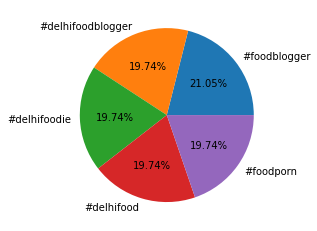

foodblogger  :  16
delhifoodblogger  :  15
delhifoodie  :  15
delhifood  :  15
foodporn  :  15


In [82]:
plt.pie(top_5_times , labels = top_5_hash , autopct = "%.2f%%")
plt.show()
for i in range(5):
    print(top_5_hash[i][1:] ," : " , top_5_times[i])

### 3) You need to also calculate average followers : likes ratio for the obtained handles.
### Followers : Likes ratio is calculated as follows:

#### 3.1) Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [23]:
from selenium.common.exceptions import NoSuchElementException  
def Post_text(insta_handles) :
    post_like = [] 
    total_like = [] 
    for i in insta_handles :
        driver.get('https://www.instagram.com/' +str(i)+'/') # visiting the most popular 5 handles
        time.sleep(3)
        posts = driver.find_elements_by_class_name('v1Nh3') # finding all posts on page
        count = 0
        posts[0].click() # clicking on first post
        count = 1
        print() 
        print('-------------','Likes of post of',i.upper(),'-------------')
        while count <= 10 : 
            try :
                time.sleep(3)
                likes = driver.find_element_by_class_name('zV_Nj').text.split(" ")[0] # extracting text of time
                print("Likes of post" , count," : ",likes) 
                if "," in likes:
                    l = likes.split(",")
                    likes = int("".join(l))
                    post_like.append(likes)
                else:
                    post_like.append(int(likes))
                    
               #print()
                next_button = driver.find_element_by_class_name('_65Bje') # clicking on next button to go to next post
                next_button.click()
                
                
            except NoSuchElementException:
                next_button = driver.find_element_by_class_name('_65Bje') # clicking on next button to go to next post
                next_button.click()
                count -= 1
            count += 1
            
    return post_like
likes_list = Post_text(top_5_blog)



------------- Likes of post of FOODZEEE -------------
Likes of post 1  :  38,029
Likes of post 2  :  32,807
Likes of post 3  :  26,618
Likes of post 4  :  136,437
Likes of post 5  :  76,662
Likes of post 6  :  71,663
Likes of post 7  :  71,090
Likes of post 8  :  42,674
Likes of post 9  :  60,380
Likes of post 10  :  41,818

------------- Likes of post of DELHIFOODGUIDE -------------
Likes of post 1  :  500
Likes of post 2  :  481
Likes of post 3  :  606
Likes of post 4  :  2,196
Likes of post 5  :  769
Likes of post 6  :  425
Likes of post 7  :  467
Likes of post 8  :  1,345
Likes of post 9  :  940
Likes of post 10  :  507

------------- Likes of post of THE.FOOD_CULT -------------
Likes of post 1  :  1,163
Likes of post 2  :  1,007
Likes of post 3  :  2,902
Likes of post 4  :  1,138
Likes of post 5  :  19,419
Likes of post 6  :  1,880
Likes of post 7  :  3,877
Likes of post 8  :  8,394
Likes of post 9  :  6,840
Likes of post 10  :  18,810

------------- Likes of post of DELHIFOODIE 

In [24]:
print(len(likes_list))

50


#### 3.2) Calculate the average likes for a handle.

In [25]:
t_sum = [] 
for i in range(1,6):
    l = likes_list[10*i - 10 : 10*i]
    t_sum.append(round(sum(l)/10))
t_sum
print("AVERAGE LIKES OF HANDLES PER 10 POSTS")
print("-------------------------------------")
for i in range(5) :
    print(top_5_blog[i] , ":" , t_sum[i])

AVERAGE LIKES OF HANDLES PER 10 POSTS
-------------------------------------
foodzeee : 59818
delhifoodguide : 824
the.food_cult : 6543
delhifoodie : 329
food_belly11 : 119


#### 3.3) Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [26]:
# max_follow => using from previous question as value already calculated in 1.1 
like_ratio = [] 
for i in range(5):
    a = t_sum[i] / max_follow[i]
    like_ratio.append(a)

print("LIKES RATIO OF EACH HANDLES")
print("---------------------------")
for i in range(5) :
    print(top_5_blog[i] , ":" , like_ratio[i])

LIKES RATIO OF EACH HANDLES
---------------------------
foodzeee : 0.10063762849307693
delhifoodguide : 0.00807708519168374
the.food_cult : 0.13376811890499457
delhifoodie : 0.03160726294552791
food_belly11 : 0.0163013698630137


#### 3.4) Create a bar graph to depict the above obtained information.

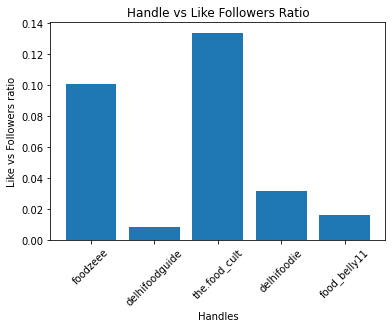

LIKES RATIO OF EACH HANDLES
---------------------------
foodzeee : 0.10063762849307693
delhifoodguide : 0.00807708519168374
the.food_cult : 0.13376811890499457
delhifoodie : 0.03160726294552791
food_belly11 : 0.0163013698630137


In [27]:
plt.bar(top_5_blog,like_ratio)
plt.xticks(rotation=45)
plt.xlabel('Handles')
plt.ylabel('Like vs Followers ratio')
plt.title('Handle vs Like Followers Ratio')
plt.show()

print("LIKES RATIO OF EACH HANDLES")
print("---------------------------")
for i in range(5) :
    print(top_5_blog[i] , ":" , like_ratio[i])